In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

In [2]:
# Between two nlm states
transition_dipole_moment = stark_int(n_1=50, n_2=51, l_1=0, l_2=1, m_1=0, m_2=0)
transition_dipole_moment

491.5268274202669

In [ ]:
# In an electric field (with B=0)
# quantum numbers
nmin = 20
nmax = 21
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = W_n(S, n_vals, L_vals, J_vals)
# field orientation
field_orientation = 'crossed'
# field-free Hamiltonian
H_0 = np.diag(En)
# find the off-diagonal terms of the Stark interaction matrix
mat_S = stark_matrix(neff, L_vals, m_vals, field_orientation)

calculate Stark terms:  24%|██▍       | 200/841 [00:04<00:15, 40.92it/s]

In [78]:
# specify the electric field
field = np.linspace(0.00, 100000000.00, 41) # V /cm
field_au = field * 100 * e * a_0 / En_h
# specify the magnetic field (in Telsa)
#B_z = 1.5776E-3
# (in atomic units)
#B_z_au = B_z / (2.35*10**5)
# Zeeman interaction Hamiltonian
#H_Z = np.diag(E_zeeman(m_vals, B_z_au))
# diagonalise for each field
eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au)

diagonalise Hamiltonian: 100%|██████████| 41/41 [00:00<00:00, 158.60it/s]


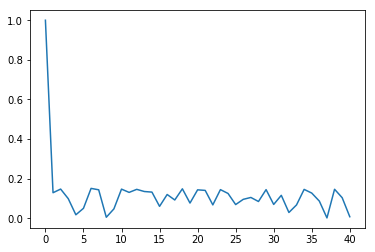

In [81]:
plt.plot(np.abs(eig_vecs[:,2,2]))

In [23]:
n_vals, L_vals, m_vals

(array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2]),
 array([ 0, -1,  0,  1,  0, -1,  0,  1, -2, -1,  0,  1,  2]))